# Libraries

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from skimage.io import imread,imshow,imsave

# load the data

In [2]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [4]:
np.unique(x_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Look at Images

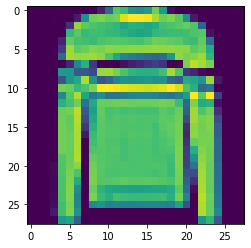

In [5]:
plt.imshow(x_train[5])

In [6]:
x_train[5].shape

(28, 28)

In [7]:
from scipy.signal import convolve2d

In [8]:
kernal = np.ones((3,3), np.uint8)

In [9]:
Gy = convolve2d(x_train[5],kernal)
Gx = convolve2d(x_train[5],kernal)

In [10]:
Gx

array([[  0,   0,   0,   0,   1,   1,   1,   0,   0,  22, 110,  42, 192,
        236, 173, 142, 209, 227,  95, 152,   9,   0,   1,   1,   1,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   1,   2,   2,  21, 151,  94,  46, 199, 134,  64,
        167, 157, 134, 168, 128, 208, 231,  17,  75, 144,  18,   1,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   2,   3,  38,  14,  79, 170,  86, 223, 143,  45,
        135, 116,  95, 125, 105, 216,  14,  72, 132,  94,  29,  83,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   2,   2, 207, 117,  99, 197,  77, 125, 105,  99,
        129, 152, 154, 131, 119, 127, 130,  78, 155, 129, 155,  26,  12,
          0,   0,   0,   0],
       [  0,   0,   0,   1,  26, 169, 240, 244, 123,  77,  69,  61,  22,
        246, 208, 204, 230,  36,  92, 119, 119, 111,  21,  85,  54, 102,
          0,   0,   0,   0],
       [  0,   0,   0,   0,  67, 137, 186, 154, 131, 134, 156, 164, 159,
        141, 114, 112, 145, 189, 214, 206, 188, 155,

In [11]:
Gy

array([[  0,   0,   0,   0,   1,   1,   1,   0,   0,  22, 110,  42, 192,
        236, 173, 142, 209, 227,  95, 152,   9,   0,   1,   1,   1,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   1,   2,   2,  21, 151,  94,  46, 199, 134,  64,
        167, 157, 134, 168, 128, 208, 231,  17,  75, 144,  18,   1,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   2,   3,  38,  14,  79, 170,  86, 223, 143,  45,
        135, 116,  95, 125, 105, 216,  14,  72, 132,  94,  29,  83,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   2,   2, 207, 117,  99, 197,  77, 125, 105,  99,
        129, 152, 154, 131, 119, 127, 130,  78, 155, 129, 155,  26,  12,
          0,   0,   0,   0],
       [  0,   0,   0,   1,  26, 169, 240, 244, 123,  77,  69,  61,  22,
        246, 208, 204, 230,  36,  92, 119, 119, 111,  21,  85,  54, 102,
          0,   0,   0,   0],
       [  0,   0,   0,   0,  67, 137, 186, 154, 131, 134, 156, 164, 159,
        141, 114, 112, 145, 189, 214, 206, 188, 155,

In [12]:
s = np.sqrt(Gy**2+Gx**2)
s

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  1.414,  1.414,  1.414,  0.   ,
         0.   , 14.14 , 11.664, 14.14 ,  0.   ,  5.656, 14.49 , 11.664,
         8.125, 12.086, 11.4  , 11.31 , 12.73 ,  0.   ,  1.414,  1.414,
         1.414,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  1.414,  2.828,  2.828, 10.68 ,  5.832,
         2.828, 11.664,  9.9  ,  8.484,  0.   , 15.03 , 12.086,  8.484,
        11.31 ,  0.   ,  0.   , 15.03 ,  8.125, 15.555,  0.   , 11.664,
         1.414,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  2.828,  4.242,  8.484, 11.664, 13.93 ,
        14.14 , 14.14 , 11.4  , 13.93 , 14.49 ,  9.9  ,  5.656, 11.4  ,
         4.242,  5.832, 11.31 , 11.664, 11.31 ,  5.656,  2.828, 12.086,
        14.49 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  2.828,  2.828, 13.93 , 15.555, 12.086,
         7.07 ,  9.055,  4.242,  5.832, 12.086,  1.414, 11.31 ,  8.484,
         4.242, 12.73 ,  1.414,  2.82

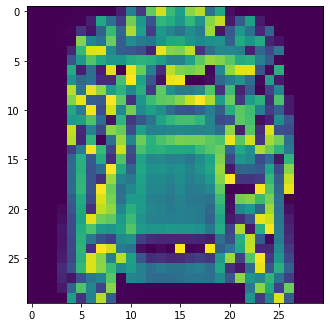

In [13]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.imshow(np.abs(Gy))

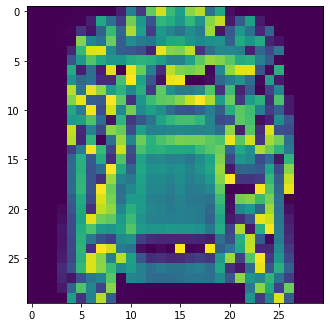

In [14]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,2)
plt.imshow(np.abs(Gx))

# Edge Filter

## Gaussian Filter

In [15]:
from skimage.filters import gaussian

In [16]:
x_train_gaussianfiltered = x_train.copy()
x_train_gaussianfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [17]:
np.unique(x_train_gaussianfiltered)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
for i in range(x_train.shape[0]):
  x_train_gaussianfiltered[i] = gaussian(x_train[i], sigma=10, truncate=1/5)

In [19]:
x_train_gaussianfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [20]:
np.unique(x_train_gaussianfiltered)

array([0], dtype=uint8)

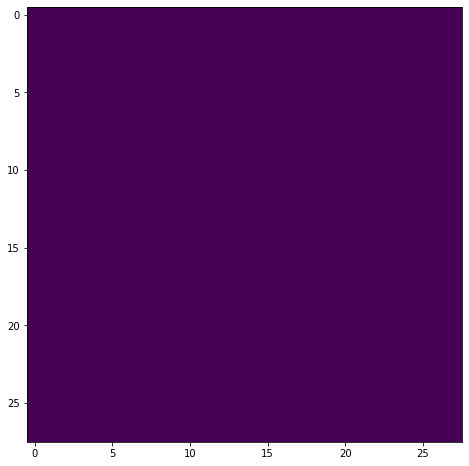

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(x_train_gaussianfiltered[10])
plt.show()

In [22]:
x_test_gaussianfiltered = x_test.copy()
x_test_gaussianfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [23]:
for i in range(x_test.shape[0]):
  x_test_gaussianfiltered[i] = gaussian(x_test[i], sigma=10, truncate=1/5)

In [24]:
x_test_gaussianfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [25]:
np.unique(x_test_gaussianfiltered)

array([0], dtype=uint8)

## Skimage Sobel Filter

In [26]:
from skimage.filters import sobel

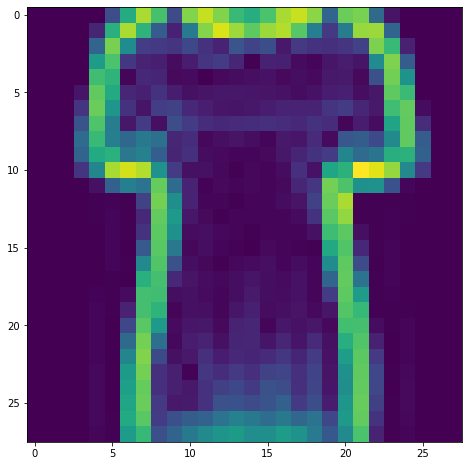

In [27]:
plt.figure(figsize=(8,8))
plt.imshow(sobel(x_train[10]))
plt.show()

In [28]:
x_train_sobelfiltered = x_train.copy()
x_train_sobelfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [29]:
np.unique(x_train_sobelfiltered)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [30]:
for i in range(x_train.shape[0]):
  x_train_sobelfiltered[i] = sobel(x_train[i])

In [31]:
x_train_sobelfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [32]:
np.unique(x_train_sobelfiltered)

array([0], dtype=uint8)

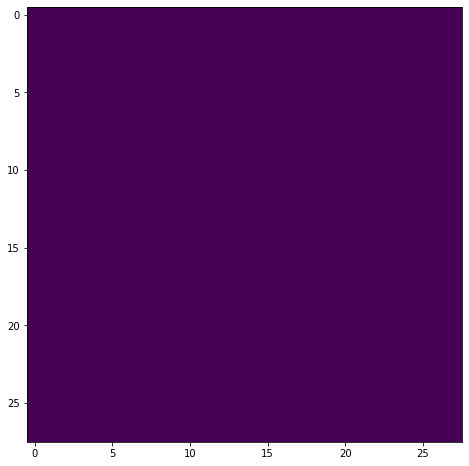

In [33]:
plt.figure(figsize=(8,8))
plt.imshow(x_train_sobelfiltered[10])
plt.show()

In [34]:
x_test_sobelfiltered = x_test.copy()
x_test_sobelfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [35]:
for i in range(x_test.shape[0]):
  x_test_sobelfiltered[i] = sobel(x_test[i])

In [36]:
x_test_sobelfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [37]:
np.unique(x_test_sobelfiltered)

array([0], dtype=uint8)

## skimage canny filter

In [38]:
from skimage.feature import canny

In [39]:
borders = canny(x_train[12], sigma=2., low_threshold=50, high_threshold=70)

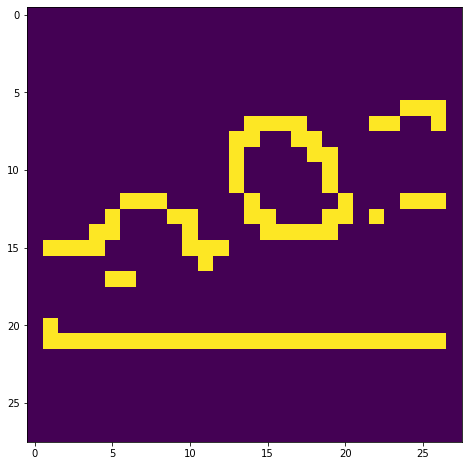

In [40]:
plt.figure(figsize=(8,8))
plt.imshow(borders)
plt.show()

In [41]:
x_train_cannyfiltered = x_train.copy()
x_train_cannyfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [42]:
np.unique(x_train_cannyfiltered)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [43]:
for i in range(x_train.shape[0]):
  x_train_cannyfiltered[i] = canny(x_train[i], sigma=2., low_threshold=50, high_threshold=70)

In [44]:
x_train_cannyfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [45]:
np.unique(x_train_cannyfiltered)

array([0, 1], dtype=uint8)

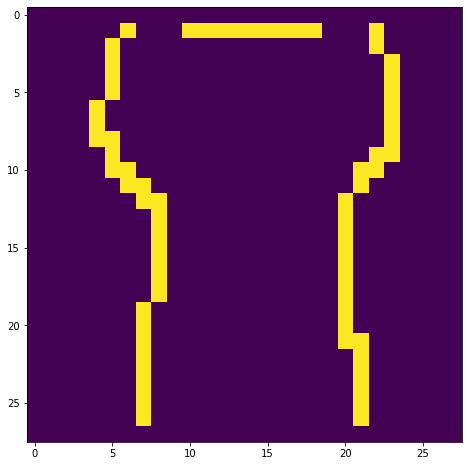

In [46]:
plt.figure(figsize=(8,8))
plt.imshow(x_train_cannyfiltered[10])
plt.show()

In [47]:
x_test_cannyfiltered = x_test.copy()
x_test_cannyfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [48]:
for i in range(x_test.shape[0]):
  x_test_cannyfiltered[i] = canny(x_test[i], sigma=2., low_threshold=50, high_threshold=70)

In [49]:
x_test_cannyfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [50]:
np.unique(x_test_cannyfiltered)

array([0, 1], dtype=uint8)

## CV2 Erode Filter

In [51]:
x_train_Erodefiltered = x_train.copy()
x_train_Erodefiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [52]:
np.unique(x_train_Erodefiltered)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [53]:
for i in range(x_train.shape[0]):
  x_train_Erodefiltered[i] = cv2.erode(x_train[i], kernal, iterations=1)

In [54]:
x_train_Erodefiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [55]:
np.unique(x_train_Erodefiltered)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

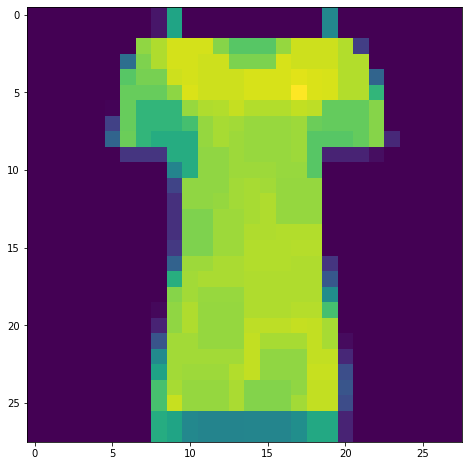

In [56]:
plt.figure(figsize=(8,8))
plt.imshow(x_train_Erodefiltered[10])
plt.show()

In [57]:
x_test_Erodefiltered = x_test.copy()
x_test_Erodefiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [58]:
for i in range(x_test.shape[0]):
  x_test_Erodefiltered[i] = cv2.erode(x_test[i], kernal, iterations=1)

In [59]:
x_test_Erodefiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [60]:
np.unique(x_test_Erodefiltered)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## CV2 morphologyEx Filter

In [61]:
x_train_morphologyExfiltered = x_train.copy()
x_train_morphologyExfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [62]:
np.unique(x_train_morphologyExfiltered)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [63]:
for i in range(x_train.shape[0]):
  x_train_morphologyExfiltered[i] = cv2.morphologyEx(x_train[i], cv2.MORPH_OPEN, kernal)

In [64]:
x_train_morphologyExfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [65]:
np.unique(x_train_morphologyExfiltered)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

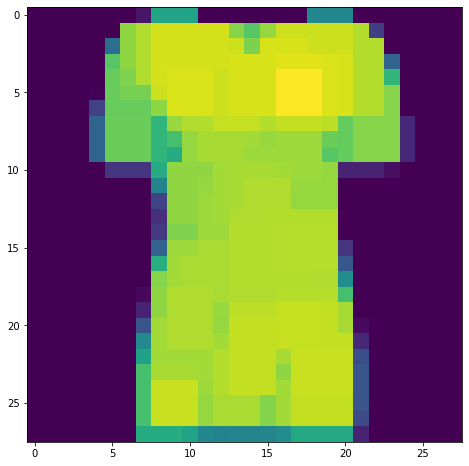

In [66]:
plt.figure(figsize=(8,8))
plt.imshow(x_train_morphologyExfiltered[10])
plt.show()

In [67]:
x_test_morphologyExfiltered = x_test.copy()
x_test_morphologyExfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [68]:
for i in range(x_test.shape[0]):
  x_test_morphologyExfiltered[i] = cv2.morphologyEx(x_test[i], cv2.MORPH_OPEN, kernal)

In [69]:
x_test_morphologyExfiltered

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [70]:
np.unique(x_test_morphologyExfiltered)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Machine Learning Model

## ***CV2 Erode Filter***

### **Reshape**

In [71]:
x_train_Erodefiltered.shape

(60000, 28, 28)

In [72]:
x_test_Erodefiltered.shape

(10000, 28, 28)

In [73]:
y_train.shape

(60000,)

In [74]:
x_train_Erodefiltered = x_train_Erodefiltered.reshape(x_train.shape[0], -1)
x_test_Erodefiltered = x_test_Erodefiltered.reshape(x_test.shape[0], -1)

In [75]:
x_train_Erodefiltered.shape

(60000, 784)

In [76]:
x_test_Erodefiltered.shape

(10000, 784)

### **LogisticRegression**

In [77]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_lg = LogisticRegression(random_state=1)

In [78]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_lg.fit(x_train_Erodefiltered, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [79]:
# Making Predictions With Our Logistic Regression Model
predictions_lg = model_lg.predict(x_test_Erodefiltered)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


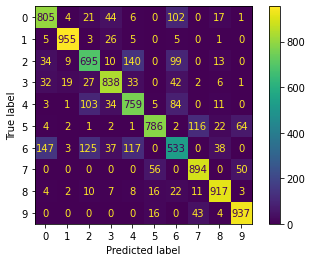

In [80]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_lg, x_test_Erodefiltered, y_test)

In [81]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_lg))

[[805   4  21  44   6   0 102   0  17   1]
 [  5 955   3  26   5   0   5   0   1   0]
 [ 34   9 695  10 140   0  99   0  13   0]
 [ 32  19  27 838  33   0  42   2   6   1]
 [  3   1 103  34 759   5  84   0  11   0]
 [  4   2   1   2   1 786   2 116  22  64]
 [147   3 125  37 117   0 533   0  38   0]
 [  0   0   0   0   0  56   0 894   0  50]
 [  4   2  10   7   8  16  22  11 917   3]
 [  0   0   0   0   0  16   0  43   4 937]]


In [82]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, predictions_lg, digits=3))

              precision    recall  f1-score   support

           0      0.779     0.805     0.792      1000
           1      0.960     0.955     0.957      1000
           2      0.706     0.695     0.700      1000
           3      0.840     0.838     0.839      1000
           4      0.710     0.759     0.734      1000
           5      0.894     0.786     0.837      1000
           6      0.600     0.533     0.564      1000
           7      0.839     0.894     0.865      1000
           8      0.891     0.917     0.904      1000
           9      0.887     0.937     0.911      1000

    accuracy                          0.812     10000
   macro avg      0.810     0.812     0.810     10000
weighted avg      0.810     0.812     0.810     10000



### **Naive Bayes**

In [83]:
# Next, we need to create our model by instantiating an instance of the Naive Bayes object.
model_nb = GaussianNB()

In [84]:
# To train the model, we need to call the fit method on the Naive Bayes object we just created and pass in our 
# x_train and y_train variables
model_nb.fit(x_train_Erodefiltered, y_train)

GaussianNB()

In [85]:
# Making Predictions With Our Naive Bayes Model.
predictions_nb = model_nb.predict(x_test_Erodefiltered)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


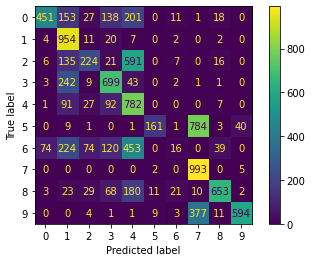

In [86]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_nb, x_test_Erodefiltered, y_test)

In [87]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_nb))

[[451 153  27 138 201   0  11   1  18   0]
 [  4 954  11  20   7   0   2   0   2   0]
 [  6 135 224  21 591   0   7   0  16   0]
 [  3 242   9 699  43   0   2   1   1   0]
 [  1  91  27  92 782   0   0   0   7   0]
 [  0   9   1   0   1 161   1 784   3  40]
 [ 74 224  74 120 453   0  16   0  39   0]
 [  0   0   0   0   0   2   0 993   0   5]
 [  3  23  29  68 180  11  21  10 653   2]
 [  0   0   4   1   1   9   3 377  11 594]]


In [88]:
# Here we have printed classification_report for the classifier.
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.83      0.45      0.58      1000
           1       0.52      0.95      0.67      1000
           2       0.55      0.22      0.32      1000
           3       0.60      0.70      0.65      1000
           4       0.35      0.78      0.48      1000
           5       0.88      0.16      0.27      1000
           6       0.25      0.02      0.03      1000
           7       0.46      0.99      0.63      1000
           8       0.87      0.65      0.75      1000
           9       0.93      0.59      0.72      1000

    accuracy                           0.55     10000
   macro avg       0.62      0.55      0.51     10000
weighted avg       0.62      0.55      0.51     10000



### **XGBoost**

In [89]:
# Next, we need to create our model by instantiating an instance of the Naive Bayes object.
model_xgb = xgb.XGBClassifier(random_state=55)

In [90]:
# To train the model, we need to call the fit method on the Naive Bayes object we just created and pass in our 
# x_train and y_train variables
model_xgb.fit(x_train_Erodefiltered, y_train)

XGBClassifier(objective='multi:softprob', random_state=55)

In [91]:
# Making Predictions With Our Naive Bayes Model.
predictions_xgb = model_xgb.predict(x_test_Erodefiltered)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


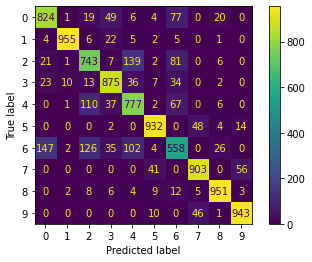

In [92]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_xgb, x_test_Erodefiltered, y_test)

In [93]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_xgb))

[[824   1  19  49   6   4  77   0  20   0]
 [  4 955   6  22   5   2   5   0   1   0]
 [ 21   1 743   7 139   2  81   0   6   0]
 [ 23  10  13 875  36   7  34   0   2   0]
 [  0   1 110  37 777   2  67   0   6   0]
 [  0   0   0   2   0 932   0  48   4  14]
 [147   2 126  35 102   4 558   0  26   0]
 [  0   0   0   0   0  41   0 903   0  56]
 [  0   2   8   6   4   9  12   5 951   3]
 [  0   0   0   0   0  10   0  46   1 943]]


In [94]:
# Here we have printed classification_report for the classifier.
print(classification_report(y_test, predictions_xgb))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1000
           1       0.98      0.95      0.97      1000
           2       0.72      0.74      0.73      1000
           3       0.85      0.88      0.86      1000
           4       0.73      0.78      0.75      1000
           5       0.92      0.93      0.93      1000
           6       0.67      0.56      0.61      1000
           7       0.90      0.90      0.90      1000
           8       0.94      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



###  **RandomForest Entropy**

In [95]:
rf = RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

In [96]:
# Fit the model
rf.fit(x_train_Erodefiltered, y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

In [97]:
# Measure model performance
y_pred_en = rf.predict(x_test_Erodefiltered)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


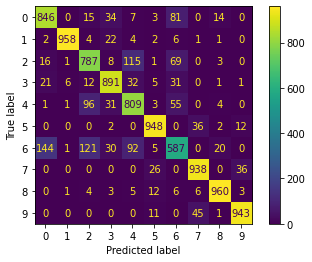

In [98]:
# We will plotting the confusion matrix.
plot_confusion_matrix(rf , x_test_Erodefiltered, y_test)

In [99]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test,y_pred_en))

[[846   0  15  34   7   3  81   0  14   0]
 [  2 958   4  22   4   2   6   1   1   0]
 [ 16   1 787   8 115   1  69   0   3   0]
 [ 21   6  12 891  32   5  31   0   1   1]
 [  1   1  96  31 809   3  55   0   4   0]
 [  0   0   0   2   0 948   0  36   2  12]
 [144   1 121  30  92   5 587   0  20   0]
 [  0   0   0   0   0  26   0 938   0  36]
 [  0   1   4   3   5  12   6   6 960   3]
 [  0   0   0   0   0  11   0  45   1 943]]


In [100]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.76      0.79      0.77      1000
           3       0.87      0.89      0.88      1000
           4       0.76      0.81      0.78      1000
           5       0.93      0.95      0.94      1000
           6       0.70      0.59      0.64      1000
           7       0.91      0.94      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## ***CV2 morphologyEx Filter***

### **Reshape**

In [101]:
x_train_morphologyExfiltered.shape

(60000, 28, 28)

In [102]:
x_test_morphologyExfiltered.shape

(10000, 28, 28)

In [103]:
y_train.shape

(60000,)

In [104]:
x_train_morphologyExfiltered = x_train_morphologyExfiltered.reshape(x_train.shape[0], -1)
x_test_morphologyExfiltered = x_test_morphologyExfiltered.reshape(x_test.shape[0], -1)

In [105]:
x_train_morphologyExfiltered.shape

(60000, 784)

In [106]:
x_test_morphologyExfiltered.shape

(10000, 784)

### **LogisticRegression**

In [107]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model_lg2 = LogisticRegression(random_state=1)

In [108]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_train and y_train variables
model_lg2.fit(x_train_morphologyExfiltered, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [109]:
# Making Predictions With Our Logistic Regression Model
predictions_lg2 = model_lg2.predict(x_test_morphologyExfiltered)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


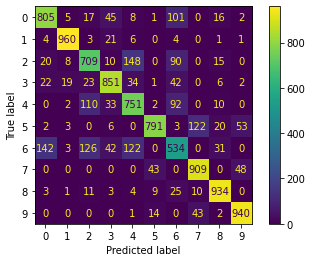

In [110]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_lg2, x_test_morphologyExfiltered, y_test)

In [111]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_lg2))

[[805   5  17  45   8   1 101   0  16   2]
 [  4 960   3  21   6   0   4   0   1   1]
 [ 20   8 709  10 148   0  90   0  15   0]
 [ 22  19  23 851  34   1  42   0   6   2]
 [  0   2 110  33 751   2  92   0  10   0]
 [  2   3   0   6   0 791   3 122  20  53]
 [142   3 126  42 122   0 534   0  31   0]
 [  0   0   0   0   0  43   0 909   0  48]
 [  3   1  11   3   4   9  25  10 934   0]
 [  0   0   0   0   1  14   0  43   2 940]]


In [112]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, predictions_lg2, digits=3))

              precision    recall  f1-score   support

           0      0.807     0.805     0.806      1000
           1      0.959     0.960     0.960      1000
           2      0.710     0.709     0.709      1000
           3      0.842     0.851     0.846      1000
           4      0.699     0.751     0.724      1000
           5      0.919     0.791     0.850      1000
           6      0.599     0.534     0.565      1000
           7      0.839     0.909     0.872      1000
           8      0.902     0.934     0.918      1000
           9      0.899     0.940     0.919      1000

    accuracy                          0.818     10000
   macro avg      0.817     0.818     0.817     10000
weighted avg      0.817     0.818     0.817     10000



### **Naive Bayes**

In [113]:
# Next, we need to create our model by instantiating an instance of the Naive Bayes object.
model_nb2 = GaussianNB()

In [114]:
# To train the model, we need to call the fit method on the Naive Bayes object we just created and pass in our 
# x_train and y_train variables
model_nb2.fit(x_train_morphologyExfiltered, y_train)

GaussianNB()

In [115]:
# Making Predictions With Our Naive Bayes Model.
predictions_nb2 = model_nb2.predict(x_test_morphologyExfiltered)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


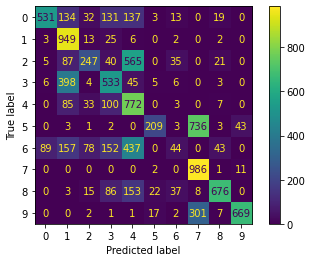

In [116]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_nb2, x_test_morphologyExfiltered, y_test)

In [117]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_nb2))

[[531 134  32 131 137   3  13   0  19   0]
 [  3 949  13  25   6   0   2   0   2   0]
 [  5  87 247  40 565   0  35   0  21   0]
 [  6 398   4 533  45   5   6   0   3   0]
 [  0  85  33 100 772   0   3   0   7   0]
 [  0   3   1   2   0 209   3 736   3  43]
 [ 89 157  78 152 437   0  44   0  43   0]
 [  0   0   0   0   0   2   0 986   1  11]
 [  0   3  15  86 153  22  37   8 676   0]
 [  0   0   2   1   1  17   2 301   7 669]]


In [118]:
# Here we have printed classification_report for the classifier.
print(classification_report(y_test, predictions_nb2))

              precision    recall  f1-score   support

           0       0.84      0.53      0.65      1000
           1       0.52      0.95      0.67      1000
           2       0.58      0.25      0.35      1000
           3       0.50      0.53      0.51      1000
           4       0.36      0.77      0.50      1000
           5       0.81      0.21      0.33      1000
           6       0.30      0.04      0.08      1000
           7       0.49      0.99      0.65      1000
           8       0.86      0.68      0.76      1000
           9       0.93      0.67      0.78      1000

    accuracy                           0.56     10000
   macro avg       0.62      0.56      0.53     10000
weighted avg       0.62      0.56      0.53     10000



### **XGBoost**

In [119]:
# Next, we need to create our model by instantiating an instance of the Naive Bayes object.
model_xgb2 = xgb.XGBClassifier(random_state=55)

In [120]:
# To train the model, we need to call the fit method on the Naive Bayes object we just created and pass in our 
# x_train and y_train variables
model_xgb2.fit(x_train_morphologyExfiltered, y_train)

XGBClassifier(objective='multi:softprob', random_state=55)

In [121]:
# Making Predictions With Our Naive Bayes Model.
predictions_xgb2 = model_xgb2.predict(x_test_morphologyExfiltered)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


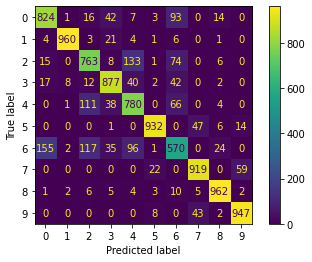

In [122]:
# We will plotting the confusion matrix.
plot_confusion_matrix(model_xgb2, x_test_morphologyExfiltered, y_test)

In [123]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predictions_xgb2))

[[824   1  16  42   7   3  93   0  14   0]
 [  4 960   3  21   4   1   6   0   1   0]
 [ 15   0 763   8 133   1  74   0   6   0]
 [ 17   8  12 877  40   2  42   0   2   0]
 [  0   1 111  38 780   0  66   0   4   0]
 [  0   0   0   1   0 932   0  47   6  14]
 [155   2 117  35  96   1 570   0  24   0]
 [  0   0   0   0   0  22   0 919   0  59]
 [  1   2   6   5   4   3  10   5 962   2]
 [  0   0   0   0   0   8   0  43   2 947]]


In [124]:
# Here we have printed classification_report for the classifier.
print(classification_report(y_test, predictions_xgb2))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.74      0.76      0.75      1000
           3       0.85      0.88      0.87      1000
           4       0.73      0.78      0.76      1000
           5       0.96      0.93      0.94      1000
           6       0.66      0.57      0.61      1000
           7       0.91      0.92      0.91      1000
           8       0.94      0.96      0.95      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



###  **RandomForest Entropy**

In [125]:
rf2 = RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

In [126]:
# Fit the model
rf2.fit(x_train_morphologyExfiltered, y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

In [127]:
# Measure model performance
y_pred_en2 = rf2.predict(x_test_morphologyExfiltered)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


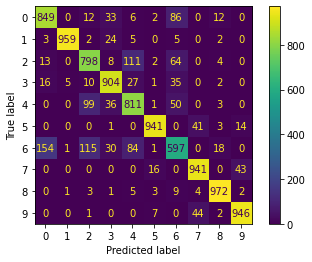

In [128]:
# We will plotting the confusion matrix.
plot_confusion_matrix(rf2 , x_test_morphologyExfiltered, y_test)

In [129]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test,y_pred_en2))

[[849   0  12  33   6   2  86   0  12   0]
 [  3 959   2  24   5   0   5   0   2   0]
 [ 13   0 798   8 111   2  64   0   4   0]
 [ 16   5  10 904  27   1  35   0   2   0]
 [  0   0  99  36 811   1  50   0   3   0]
 [  0   0   0   1   0 941   0  41   3  14]
 [154   1 115  30  84   1 597   0  18   0]
 [  0   0   0   0   0  16   0 941   0  43]
 [  0   1   3   1   5   3   9   4 972   2]
 [  0   0   1   0   0   7   0  44   2 946]]


In [130]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test,y_pred_en2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.80      0.78      1000
           3       0.87      0.90      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.97      0.94      0.95      1000
           6       0.71      0.60      0.65      1000
           7       0.91      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

